In [19]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_excel('~/git/water/Cost-B.xlsx')
df2 = df.rename({df.columns[0]: 'dirt', df.columns[-1]: 'cost'}, axis=1)
df2.pop(df.columns[1])
df2.head()

,dirt,C,D,cost
0,70.0,17.000000,118.000000,3.132000
1,70.0,114.680482,171.433735,5.263562
2,70.0,287.000000,208.000000,7.152000
3,71.0,17.000000,118.000000,3.032000
4,71.0,123.428571,184.785714,5.670571


In [21]:
x = df2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled, columns = df2.columns)

In [22]:
x = df2['C'][:10].values
y = df2['dirt'][:10].values

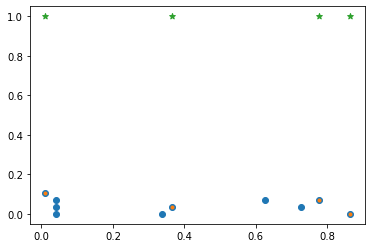

In [41]:
def plt_transmittion_noise(x_data, y_data, percent): 
    # 當投入C藥劑時，濁度感測器傳輸過程出現噪音
    np.random.seed(0)
    
    x = x_data.copy()
    y = y_data.copy()
    
    nums = int(len(y)/100*percent)
    if nums == 0:
        nums = 1
    plt.scatter(x, y, marker='o')

    rand = np.random.choice(range(len(y)), nums, replace=False)
    noise = np.ones(nums)
#     noise += y.max()
    
    plt.scatter(x[rand], y[rand], marker='.')
    plt.scatter(x[rand], noise, marker='*') 

plt_transmittion_noise(x, y, 40)
# plt.scatter(x, y, marker='o')

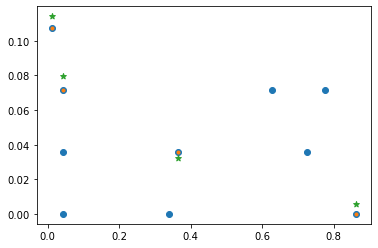

In [42]:
def plt_disturb(x_data, y_data, percent): 
    # 當投入C藥劑時，濁度感測器接接收或解號時出現擾動
    np.random.seed(1)
    
    x = x_data.copy()
    y = y_data.copy()
    

    nums = int(len(y)/100*percent)
    if nums == 0:
        nums = 1
    plt.scatter(x, y, marker='o');

    rand = np.random.choice(range(len(y)), nums, replace=False)
    plt.scatter(x[rand], y[rand], marker='.')
    
    noise = []
    for i in y[rand]:
        a = np.random.normal(loc=i, scale=y.std())
        noise.append(a)
    noise = np.array(noise)
    noise *= 0.1
    y[rand] += noise
    
    plt.scatter(x[rand], y[rand], marker='*')
    
    
plt_disturb(x, y, 40)


In [167]:
x.std()

0.32434840686431826

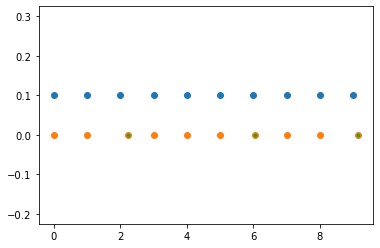

In [184]:
def plt_delay(x_data, y_data, percent):
    np.random.seed(1)
    
    x = x_data.copy()
    y = y_data.copy()
    
    x = np.array(range(10))
    x = x * 1.
    y1 = np.zeros(10)
    y1 += 0.1
    y2 = np.zeros(10)
    
    nums = int(len(y)/100*percent)
    if nums == 0:
        nums = 1
        
    plt.scatter(x, y1, marker='o')
    
    rand = np.random.choice(range(len(y)), nums, replace=False)
    
    noise = []
    scale = x.std()/len(x)
    for i in x[rand]:
        a = abs(np.random.normal(loc=0, scale=scale))
        a = abs(a)
        noise.append(a)
    
    noise = np.array(noise)
    noise *= 0.5
    x[rand] += noise
    
    plt.scatter(x, y2, marker='o')
    plt.scatter(x[rand], y2[rand], marker='.')

    x1 = np.array([0, 9])
    y = np.array([-0.2, 0.3])
    
#     
    plt.scatter(x1, y, marker='o', c='w')
    
plt_delay(x, y, 30)

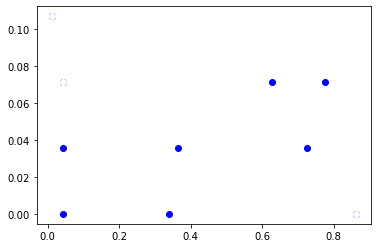

In [207]:
def plt_dropout(x_data, y_data, percent):
    np.random.seed(1)
    
    x = x_data.copy()
    y = y_data.copy()
    
    nums = int(len(y)/100*percent)
    if nums == 0:
        nums = 1
        
    plt.scatter(x, y, marker='o', c = 'b')
    
    rand = np.random.choice(range(len(y)), nums, replace=False)
    
    plt.scatter(x[rand], y[rand], marker='o', c = 'w')

    
plt_dropout(x, y, 30)

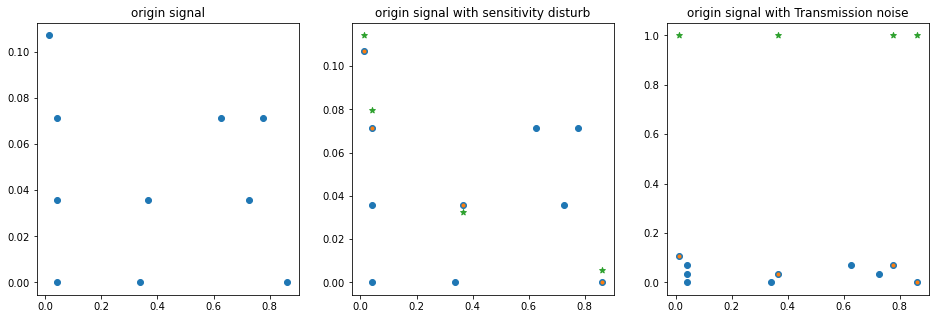

In [202]:
fig=plt.figure(figsize = (16, 5))

fig_place = [1,3]

subplot1 = fig.add_subplot(fig_place[0], fig_place[1], 1)
plt.scatter(x, y, marker='o')
plt.title("origin signal", y=1)

subplot2 = fig.add_subplot(fig_place[0], fig_place[1], 3)
plt.title("origin signal with Transmission noise")
plt_transmittion_noise(x, y, 40)

subplot3 = fig.add_subplot(fig_place[0], fig_place[1], 2)
plt.title("origin signal with sensitivity disturb")
plt_disturb(x, y, 40)
plt.show()

# plt.scatter(df2['D'].values, df2['dirt'].values, marker='o');

Text(0.5, 1.0, 'origin signal with delay feedback')

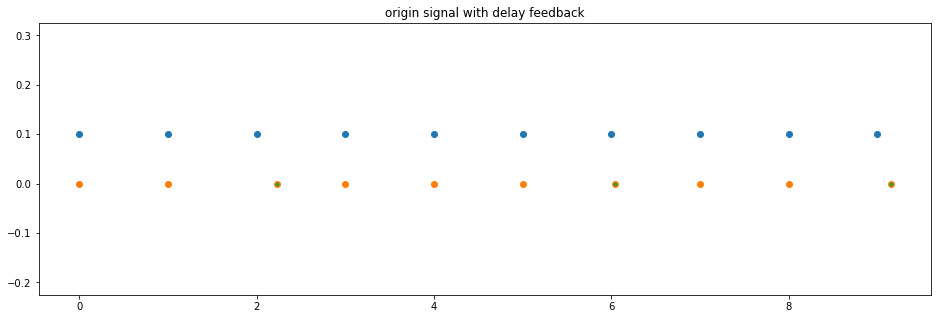

In [181]:
fig=plt.figure(figsize = (16, 5))

fig_place = [1,3]


plt_delay(x, y, 30)
plt.title("origin signal with delay feedback")


# plt.scatter(df2['D'].values, df2['dirt'].values, marker='o');

Text(0.5, 1, 'origin signal with missing value')

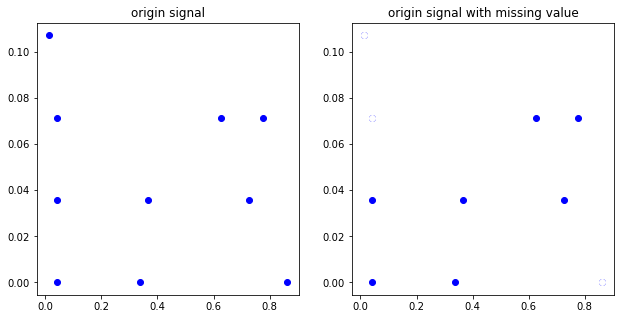

In [208]:
fig=plt.figure(figsize = (16, 5))

fig_place = [1,3]

subplot1 = fig.add_subplot(fig_place[0], fig_place[1], 1)
plt.scatter(x, y, marker='o', c ='b')
plt.title("origin signal", y=1)

subplot2 = fig.add_subplot(fig_place[0], fig_place[1], 2)
plt_dropout(x, y, 30)
plt.title("origin signal with missing value", y=1)